# TAREA

Nombre: Israel Santiago Gómez

Fecha: 06/10/2023

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [8]:
import numpy as np
import pandas as pd

def f(x):
    return np.e**x*np.log10(x)
#resultado sacado en wolfram = 6.09207

def g(x):
    return np.sin(x)*np.log(x)
#resultado sacado en wolfram = 0.8698


#Limite inferior (a) y limite superior  (b)

a = 1
b = 3

N = np.logspace(1, 5, 5 )

#Se genera la tabla
tabla = pd.DataFrame(columns = ["Aproximacion f(x)", "Error f(x)", "Aproximacion g(x)", "Error g(x)"], index = N)
tabla

,Aproximacion f(x),Error f(x),Aproximacion g(x),Error g(x)
10.0,NaN,NaN,NaN,NaN
100.0,NaN,NaN,NaN,NaN
1000.0,NaN,NaN,NaN,NaN
10000.0,NaN,NaN,NaN,NaN
100000.0,NaN,NaN,NaN,NaN


In [9]:
#Funcion Montecarlo
def montecarlo(f, N, a , b) :
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

In [10]:
#Ciclo para hacer cada integracion y meterla en la tabla
for i in N :
    aproximacion = montecarlo(f, int(i), a, b)
    tabla.loc[i, "Aproximacion f(x)"] = aproximacion
    tabla.loc[i, "Error f(x)"] = abs(6.09207 - aproximacion)

for i in N :
    aproximacion = montecarlo(g, int(i), a, b)
    tabla.loc[i, "Aproximacion g(x)"] = aproximacion
    tabla.loc[i, "Error g(x)"] = abs(0.8698 - aproximacion)
    
tabla


,Aproximacion f(x),Error f(x),Aproximacion g(x),Error g(x)
10.0,4.448231,1.643839,0.806758,0.063042
100.0,7.073799,0.981729,0.873298,0.003498
1000.0,6.084093,0.007977,0.873405,0.003605
10000.0,6.13574,0.04367,0.873729,0.003929
100000.0,6.087212,0.004858,0.870872,0.001072


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [14]:
import matplotlib.pyplot as plt

def s(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7


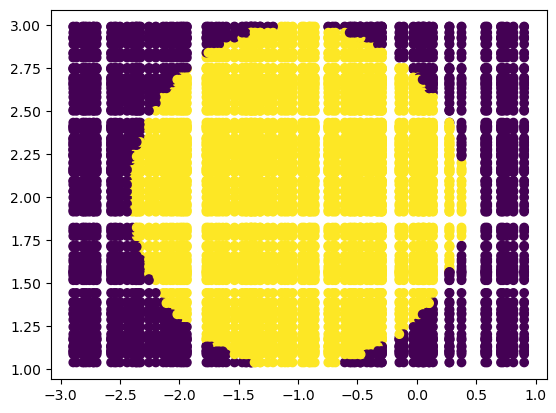

In [17]:
x = np.random.uniform(-3, 1, 100)
y = np.random.uniform(1, 3, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=s(X, Y))

In [28]:
def montecarlo2 (region, xa, xb, ya, yb, N) :
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa)*(yb - ya)
    return np.mean(B)*AR
    
N = np.logspace(1, 5, 5)

a1 = -3
b1 = 1

a2 = 1
b2 = 3

AR1 = (b1-a1)*(b2-a1)

tabla = pd.DataFrame(columns=["Aproximacion"], index=N)

for i in N :
    aproximacion = montecarlo2(s, a1, b1, a2, b2, int(i))
    area_aprox1 = montecarlo2(s, a1, b1, a2, b2, int(i))
    Crel1 = ((1-area_aprox1/AR1)/(area_aprox1/AR1))**(1/2)
    er1 = np.log10(Crel1) - np.log(i)/2
    tabla.loc[i, "Error relativo "] = er1
    tabla.loc[i, "Aproximacion"] = aproximacion

    
tabla

,Aproximacion,Error relativo
10.0,6.4,-0.931626
100.0,4.64,-2.014881
1000.0,4.552,-3.116165
10000.0,4.488,-4.287471
100000.0,4.4512,-5.433407


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

**Análisis de carga sísmica y seguridad estructural:**

Descripción: En la ingeniería civil, es fundamental evaluar la seguridad estructural de edificios, puentes y otras infraestructuras frente a cargas sísmicas. Sin embargo, las características de los terremotos (magnitud, ubicación, profundidad, etc.) son inciertas y variables.

Uso de Montecarlo: Se pueden utilizar métodos de Montecarlo para simular miles de posibles eventos sísmicos y calcular las fuerzas y momentos resultantes en las estructuras. Esto permite estimar la probabilidad de falla estructural bajo diferentes escenarios sísmicos y tomar decisiones de diseño y mitigación más informadas.

**Diseño de sistemas de drenaje pluvial:**

Descripción: En la planificación y el diseño de sistemas de drenaje pluvial, es importante estimar con precisión las tasas de escorrentía y el volumen de agua que se acumulará durante eventos de lluvia, que pueden variar significativamente.

Uso de Montecarlo: Se pueden utilizar técnicas de Montecarlo para generar múltiples secuencias de eventos de lluvia que sigan una distribución de probabilidad realista. Luego, se modela el sistema de drenaje pluvial para cada secuencia de eventos y se evalúa su desempeño. Esto proporciona una estimación probabilística de la capacidad del sistema para manejar condiciones de lluvia extremas

**Gestión de proyectos de construcción:**

Descripción: En la gestión de proyectos de construcción, se deben realizar estimaciones de costos y duración que pueden verse afectadas por diversas fuentes de incertidumbre, como retrasos imprevistos, cambios en el suministro de materiales y fluctuaciones en los costos.

Uso de Montecarlo: La integración de Montecarlo se utiliza para realizar análisis de riesgos en proyectos de construcción. Se generan miles de escenarios de proyecto simulados, cada uno con diferentes valores para las variables inciertas (por ejemplo, tiempo de retraso, costo de materiales). Esto permite calcular la probabilidad de que el proyecto se complete dentro de un presupuesto dado o antes de una fecha límite, lo que ayuda en la toma de decisiones de planificación y gestión.